In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np


In [2]:
data = pd.read_csv("C:\\Users\\Harish Kate\\Documents\\AirPassengers.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
data.index


RangeIndex(start=0, stop=144, step=1)

In [8]:
from datetime import datetime
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [67]:
#convert to time series:
ts =  data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [68]:
ts['1949-09-01']

136

In [69]:

ts[datetime(1949,9,1)]

136

In [70]:
ts['1949-01-01' : '1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [71]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [72]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

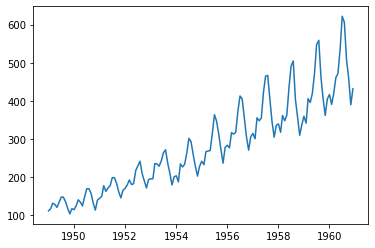

In [73]:
plt.plot(ts)

In [74]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts, autolag= 'AIC')
dftest

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

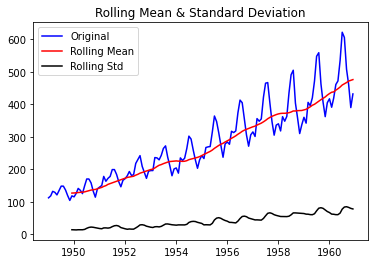

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [75]:
test_stationarity(ts)

In [93]:
ts_log = np.log(ts)

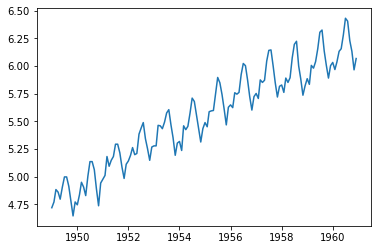

In [94]:
plt.plot(ts_log)

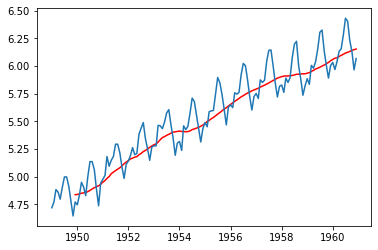

In [95]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(moving_avg,color='red')
plt.plot(ts_log)

In [96]:
ts_log_moving_avg_diff = ts - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    113.163822
Name: #Passengers, dtype: float64

In [97]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01    113.163822
1950-01-01    110.161619
1950-02-01    121.156152
1950-03-01    136.150656
1950-04-01    130.146867
Name: #Passengers, dtype: float64

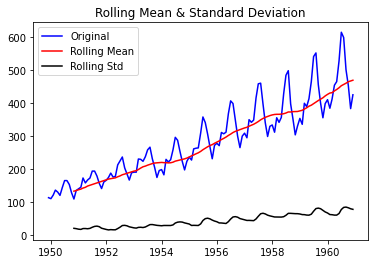

Results of Dickey-Fuller Test:
Test Statistic                   0.697532
p-value                          0.989788
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [98]:
test_stationarity(ts_log_moving_avg_diff)

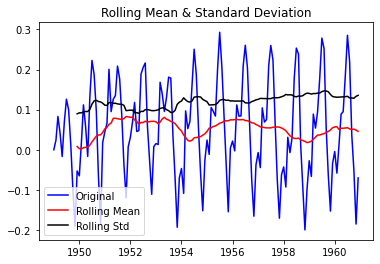

Results of Dickey-Fuller Test:
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [99]:
expwighted_avg = ts_log.ewm(span=12).mean()
expwighted_avg_diff = ts_log - expwighted_avg
test_stationarity(expwighted_avg_diff)

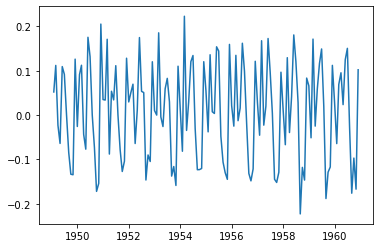

In [100]:
#take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

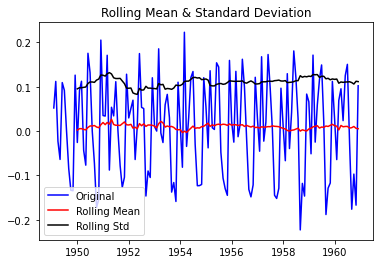

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [101]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

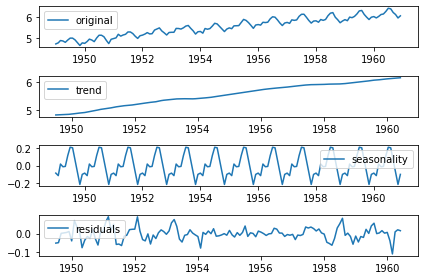

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal=  decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
           
plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')
           
plt.subplot(414)
plt.plot(residual, label='residuals')
plt.legend(loc='best')
plt.tight_layout()

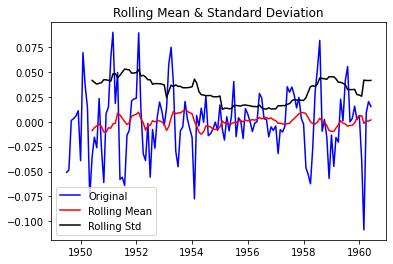

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [112]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

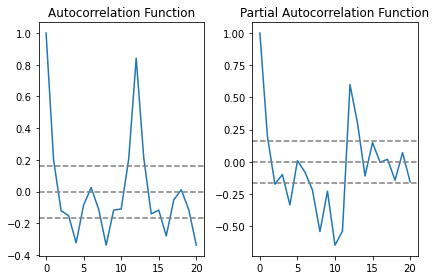

In [122]:
from statsmodels.tsa.arima_model import ARIMA
#acf and pacf plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff,nlags =20, method ='ols')

#plotACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle ='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle ='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle ='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle ='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [121]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [136]:
model = auto_arima(ts, start_p=1, start_q=1)
print (model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Sat, 24 Sep 2022   AIC                           1365.825
Time:                        18:47:02   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.3

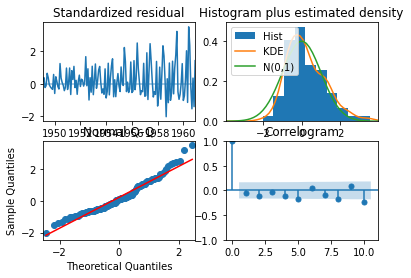

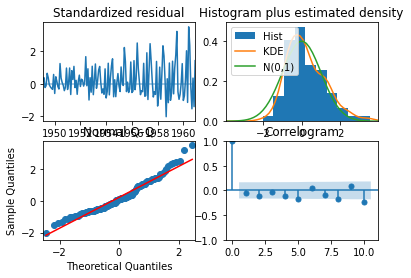

In [129]:
model.plot_diagnostics()

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Sat, 24 Sep 2022   AIC                           1365.825
Time:                        18:44:49   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1727     85.616      8.458      0.000     556.369     891.976
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(ts_log,order)

NameError: name 'order' is not defined

In [139]:
n = 24
fc, confint = model.predict(n_periods=n, return_conf_int= True)
index_of_fc = np.arange(len(df1), len(df1)+n)

fc_series = pd.series(fc, index= index_of_fc)
lower_series = pd.Series(confint[:, 0], index = index_of_fc)
upper_series = pd.Series(confint[:, 1], index= index_of_fc)

plt.plot(df1)
plt.plot(fc_series, color='green')
plt.fill_between(lower_series.index,
                lower_Series,
                upper_series,
                color='green', alpha=0.25)
plt.title("sarima -final forecast of a10 -drug sales")
plt.show()

NameError: name 'df1' is not defined